# Identifying and Quantifying the Quantumness in Quantum Computing

## Overall, I want to focus on Quantum Applications and Algorithms

- When to use Quantum Computers? <br>  
- How to Program a quantum computer using the gate model? <br> 
- How to Write a New Algorithm? <br>

## Specifically, I want to focus on identifying where the quantumness comes from, what is responsible for the quantum speedup

- last time, I focused on Interference, Superposition, and Entanglement 
  <a href=https://github.com/Seattle-Quantum-Computing-Meetup/sqcm_challenges>(see the jupyter notebooks for Oct_2023)</a>
  
- tonight, I will focus on three "quantum resources" - 1) entanglement 2) magic and 3) fermionic magic, and do so by reporting on the two references listed below  

<h3>References:</h3><br>

<dl>
  <a href="https://www.quantamagazine.org/the-quest-to-quantify-quantumness-20231019/"><dt><i>The Quest to Quantify Quantumness</i>, Charlie Wood, Quanta Magazine</dt></a>
  <dd>- identifies 3 quantum resources</dd>
  <br>  
    <a href="https://arxiv.org/abs/2212.10582"><dt><i>Sharp complexity phase transitions generated by entanglement</i>, Fefferman et. al</dt></a>
  <dd>- found a computational problem in which entanglement is directly responsible for a dramatic quantum computational speedup over any efficient classical algorithm.</dd>
</dl>

## Ref. 1: The Quest to Quantify the Quantumness (C. Wood, Quanta Mag)

#### The article's opening question: 
"What makes a quantum computer more powerful than a classical computer? <br>
It’s a surprisingly subtle question that physicists are still grappling with, decades into the quantum age."<br>

#### Hard to say for sure where quantum methods are superior:

"But for tasks less glamorous than factoring, it’s hard to say for sure whether quantum methods are superior. Searching for further blockbuster applications has become something of a haphazard guessing game."

#### The Goal

"Their goal? To find a way to quantify quantumness. They dream of a number they can assign to an arrangement of qubits produced by some quantum calculation. If the number is low, then it would be easy to simulate that calculation on a laptop. If it’s high, the qubits represent the answer to a truly hard problem beyond the reach of any classical device.

In short, researchers are seeking the physical ingredient at the root of quantum devices’ potential power."

#### Fundamental - "where the classical ends, and where the quantum truly begins"

"It’s “quite fundamental to understand where this horizon is,” said Kamil Korzekwa of Jagiellonian University in Poland, one of the researchers behind the new works. “What is really quantum about quantum?”


### Identified 3 Quantum Resources 

<ol>
    <li>Entanglement</li>
    <li>Magic - generated by T gates</li>
    <li>Fermionic Magic - generated by SWAP gates </li>
</ol>


#### "Classical islands in a vast quantum sea"

"Now researchers are growing comfortable quantifying quantumness using three metrics, each corresponding to one of three classical simulation methods. If a collection of qubits is largely unentangled, has little magic, or simulates a bunch of nearly free fermions, then researchers know they can reproduce its output on a classical laptop. Any quantum circuit with a low score on one of these three quantum metrics lies in the shallows just off the shores of a classical island, and certainly won’t be the next Shor’s algorithm."

"Vast quantum sea with classical islands," C. Wood.  


### What is a Quantum Resource?

"not just as a quantum property, but as a quantum resource: It was what you needed to reach the uncharted depths, where powerful quantum algorithms like Shor’s resided."


### Is any one of these resources sufficient?  

According to the Fefferman paper, it would seem that entanglement is sufficient for their particular type of quantum states, but not for all types of quantum states.

### What if you have 0 for one of the quantum resources, can the circuit be efficiently simulated classically?

<table>
  <tr>
    <th>Quantum Resource</th>
    <th>Value</th>
    <th>How Efficiently Simulate Classically</th>
  </tr>
  <tr>
    <td>Entanglement</td>
    <td>0</td>
    <td>Jozsa</td>
  </tr>
  <tr>
    <td>Magic (from T gates)</td>
    <td>0</td>
    <td>Bravyi-Gosset</td>
  </tr>
  <tr>
    <td>FermionicMagic (from SWAP gates)</td>
    <td>0</td>
    <td>Valiant</td>
  </tr>  
</table>

"If a collection of qubits is largely unentangled, has little magic, or simulates a bunch of nearly free fermions, then researchers know they can reproduce its output on a classical laptop. Any quantum circuit with a low score on one of these three quantum metrics lies in the shallows just off the shores of a classical island, and certainly won’t be the next Shor’s algorithm."

### What is the justification or explanation for each of these?

#### Entanglement

"Entanglement, the phenomenon in which two quantum particles form a shared state, encapsulated what was hard about doing quantum mechanics — and therefore what quantum computers could excel at."

“Entanglement was mentioned very quickly,” said Richard Jozsa, a mathematician at the University of Cambridge. “And everyone just assumed that was it.”

#### Adding T gates, which are not Clifford gates
The ability to classically simulate entanglement seemed like a bit of a miracle, but there was a catch. The Gottesman-Knill algorithm couldn’t handle all quantum circuits, just those that stuck to the so-called Clifford gates. But if you added a “T gate,” a seemingly innocuous gadget that rotates a qubit in a particular way, their program would choke on it.

Clifford Gates: I, X, Y, Z, H, CZ, SWAP, CNOT <br>
Non-Clifford Gates: T and Toffoli <br>

#### Fermionic Magic

"When swap gates are used, the simulated fermions (like electrons) interact, crashing together and doing other complicated things. These problems are extremely hard, if not unsolvable."


### What is the relationship of the quantum resource to the mathematical language/framework?

"Rather, the three quantum resources seem to be artifacts of the mathematical languages used to cram the complexity of quantumness into simpler frameworks. Entanglement emerges as a resource when you practice quantum mechanics in the way Schrödinger outlined, which uses his eponymous equation to predict how a particle’s wave function will change in the future. This is the textbook version of quantum mechanics, but it isn’t the only version."

"When Gottesman developed his method of simulating Clifford circuits, he based it on an older variety of quantum mechanics developed by Werner Heisenberg. In Heisenberg’s mathematical language, the state of the particles doesn’t change. Instead, it’s the “operators” — the mathematical objects you might use to predict the odds of some observation — that evolve. Restricting one’s view to free fermions involves viewing quantum mechanics through yet another mathematical lens."

"Each mathematical language eloquently captures certain aspects of quantum states, but at the price of garbling some other quantum property. These clumsily expressed properties then become the quantum resource in that mathematical framework — the magic, the entanglement, the fermionic magic. Overcoming this limitation and identifying one quantum feature to rule them all, Jozsa speculates, would require learning all the possible mathematical languages for expressing quantum mechanics and looking for universal traits they all might share."

#### Jozsa's Thoughts/Speculations: 
would need to learn "all the possible mathematical languages for expressing quantum mechanics and look for universal traits they all might share"  


### We can take a simple look at these in Qiskit code

<br>

In [22]:
import numpy as np
from qiskit import Aer, BasicAer, ClassicalRegister, QuantumCircuit, QuantumRegister
from qiskit.execute_function import execute
from qiskit.visualization import plot_bloch_vector
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram

<H3>Quantum Resource #1: Entanglement - a Bell State example in Qiskit</H3>

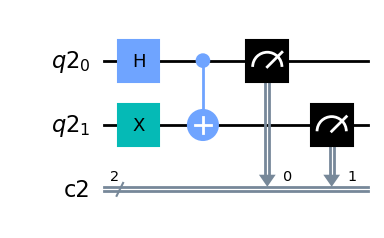

In [18]:
num_qubits = 2
num_cl_bits = 2

qr = QuantumRegister(num_qubits)
cr = ClassicalRegister(num_cl_bits)

qc = QuantumCircuit(qr, cr)

qc.h(0)
qc.x(1)
qc.cnot(0,1)

qc.measure(qr, cr)
qc.draw("mpl")

In [13]:
simulator = Aer.get_backend('aer_simulator')
result = simulator.run(qc, shots=1000).result()
counts = result.get_counts()
print(counts)

{'01': 501, '10': 499}


Above we see two possible states as the output, |01> or |10>.  Here we measure two qubits, and for each qubit, when we measure it, we will measure either a zero or a one.<br><br>
We ran the circuit 1000 times; the output is probabilistic, not deterministic, which means we can get a different answer each time we run the circuit.  We see that each of these states has a 50% chance of being measured.  We measured the state "|01>" 501 times out of 1000, and "|10>" 499 times out of 1000.<br><br>
With two qubits, generally speaking, there are 4 possible states: |00>, |01>, |10>, and |11>.<br>
And, if we know that the first qubit is a zero, then we don't know if the other qubit is a 0 or a 1, and similarly, if the first qubit is a one.<br><br>
However, when our output belongs to the set, {|01>, |10>}, we see that if the first qubit is a zero, then the second qubit has to be a one, and if the first qubit is a one, then the second qubit has to be a 0.  This represents a type of correlation referred to as entanglement.  

<H3>"Magic" - generate with T gates in Qiskit</H3>

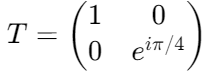

### Quirk is an excellent online interactive quantum circuit simulator, created by Craig Gidney

<a href=https://algassert.com/quirk>Quirk Quantum Circuit Simulator</a> 

<a href=https://docs.quantum.ibm.com/api/qiskit/0.37/qiskit.circuit.library.TGate>Qiskit doc: Single qubit T gate (Z**0.25)</a>

It rotates around Z, and induces a π/4 phase, and is sometimes called the pi/8 gate (because of how the RZ(pi/4) matrix looks like).<br>

This is a non-Clifford gate and a fourth-root of Pauli-Z.

### First, let's look at applying a T gate using Quirk


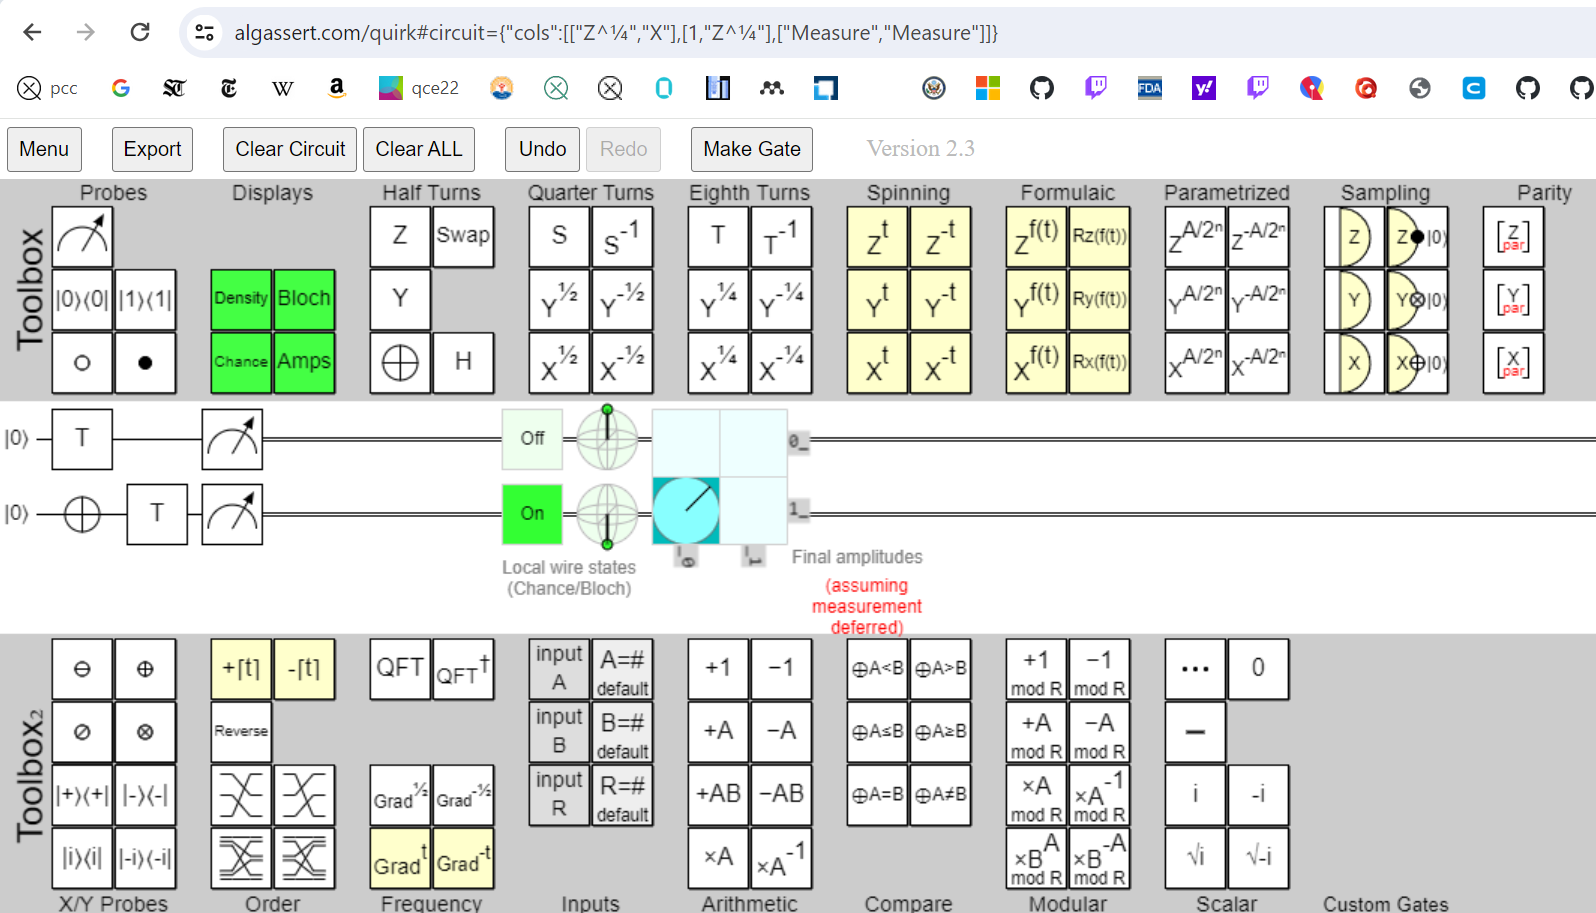

### Now, let's create the circuit using Qiskit

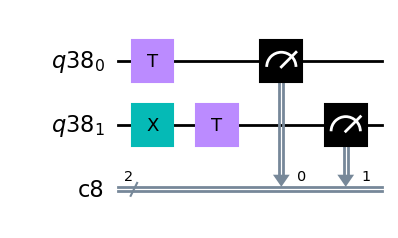

In [41]:
num_qubits = 2
num_cl_bits = 2

qr = QuantumRegister(num_qubits)
cr = ClassicalRegister(num_cl_bits)

qc = QuantumCircuit(qr, cr)

qc.t(0)
qc.x(1)
qc.t(1)

qc.measure(qr, cr)
qc.draw("mpl")

In [42]:
simulator = Aer.get_backend('aer_simulator')
result = simulator.run(qc, shots=1000).result()
counts = result.get_counts()
print(counts)

{'10': 1000}


This circuit is deterministic.  When running it on classical quantum simulator, like I did here, which has no error model added, we will always get the state |10> as output.  

In [43]:
backend = BasicAer.get_backend('statevector_simulator')

job = execute(qc, backend)

result = job.result()

state_vector = result.get_statevector()

# Print the statevector for a 2-qubit state, (|00>, |01>, |10>, |11>)

# We see the result amplitudes: (0, 0, 0.70710678+0.70710678j, 0)
# which corresponds to probabilities: (0, 0, 1, 0)

# In Qiskit, the qubits are listed from right to left, the right-most qubit is the first qubit.

print(state_vector)
print()
print("The probability of the state |10> is abs(complex(0.70710678, 0.70710678)**2):", abs(complex(1/np.sqrt(2), 1/np.sqrt(2))**2))

[0.        +0.j         0.        +0.j         0.70710678+0.70710678j
 0.        +0.j        ]

The probability of the state |10> is abs(complex(0.70710678, 0.70710678)**2): 0.9999999999999998


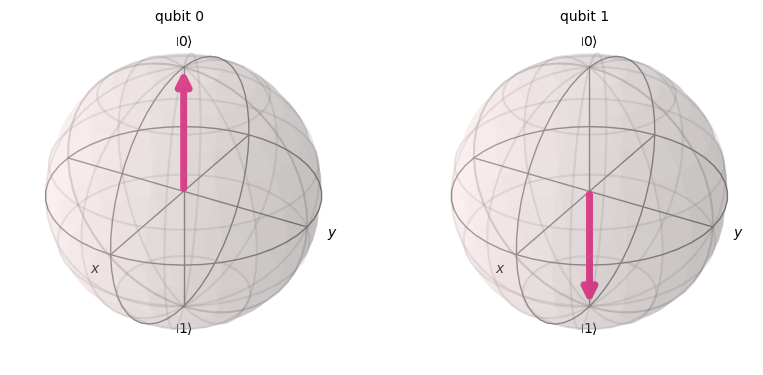

In [44]:
plot_bloch_multivector(state_vector)

<H3>Quantum Resource #2: Fermionic Magic - generate with SWAP gates in Qiskit</H3>

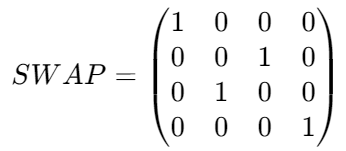

<a href=https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.SwapGate>Qiskit doc: SWAP gate </a>

This is a symmetric and Clifford gate. <br><br>


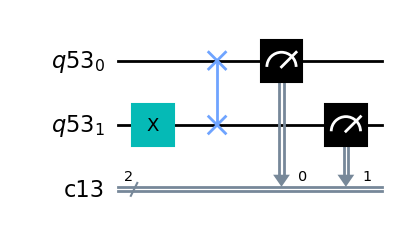

In [51]:
num_qubits = 2
num_cl_bits = 2

qr = QuantumRegister(num_qubits)
cr = ClassicalRegister(num_cl_bits)

qc = QuantumCircuit(qr, cr)

qc.x(1)
qc.swap(0,1)

qc.measure(qr, cr)
qc.draw("mpl")

In [52]:
backend = BasicAer.get_backend('statevector_simulator')

job = execute(qc, backend)

result = job.result()

state_vector = result.get_statevector()

# Print the statevector for a 2-qubit state, (|00>, |01>, |10>, |11>)

# We see the result amplitudes: (0, 1, 0, 0)
# which corresponds to probabilities: (0, 1, 0, 0)

# In Qiskit, the qubits are listed from right to left, the right-most qubit is the first qubit.

print(state_vector)
print()
print("The probability of the state |01> is 1**2):", 1**2)

[0.+0.j 1.+0.j 0.+0.j 0.+0.j]

The probability of the state |01> is 1**2): 1


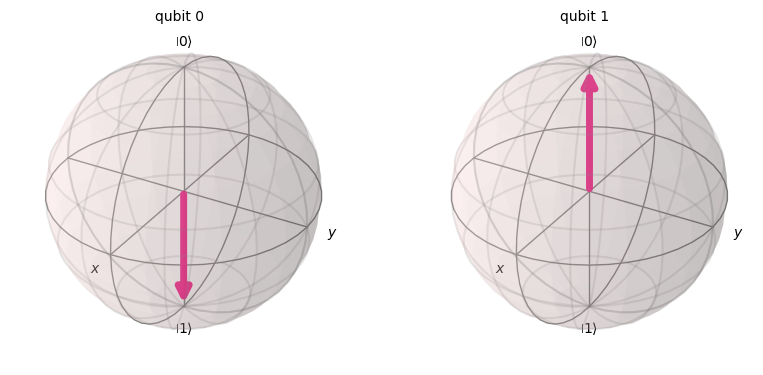

In [53]:
plot_bloch_multivector(state_vector)

## Ref 2. Sharp complexity phase transitions generated by entanglement (Fefferman, et. al)


#### The What: They prove that entanglement is the sole cause of their quantum circuit to be hard to simulate classically. <br>

"In this paper, we answer Aaronson’s question quantitatively with respect to the entanglement of regular
graph states." 

They are seeking: "a quantitative connection between the entanglement present in
certain quantum states and the inherent computational complexity of simulating those states," from their paper.


<a href=https://www.scottaaronson.com/writings/qchallenge.html>link to Scott Aaronson's Ten Semi-Grand Challenges for Quantum Computing Theory</a>

Challenge #2 states: <br>
"The flip side: what quantum systems can be simulated in classical polynomial time? Though we don't always appreciate it, this is a question of direct and immediate interest to condensed-matter physicists (or so they tell me!). We know basically three examples with nontrivial classical simulations: stabilizer circuits, fermionic systems with noninteracting modes, and quantum computers with bounded Schmidt rank (a measure of entanglement). Are there common generalizations of these three examples? Also, can we efficiently simulate a quantum computer that's (say) always in a separable mixed state, or always in a state representable by a small number of linear combinations and tensor products?"


#### Intro to the Paper: 

"A fundamental question since the inception of quantum
computing has been to understand the physical mechanisms underlying the computational speedup of quantum computers. One of the most widely studied resources for a quantum speedup is entanglement [1, 2].
However, understanding precisely how much entanglement is necessary and sufficient for a quantum system
to be intractable to arbitrary classical simulation techniques has remained elusive. Quantum computations
involving next to no entanglement can be hard to simulate classically [3–5] and relatively little entanglement
can be universal for quantum computation [6–8], while
states with very high entanglement can be useless for
quantum computation [9, 10]."

#### Take-aways:

High entanglement does not imply useful for quantum computing. <br>
Next to no entanglment can be hard to simulate classically. <br>
Relatively little entanglement can be universal for quantum computation. <br>


#### The How: They use k-regular graph states, and write a mathematical proof. <br>

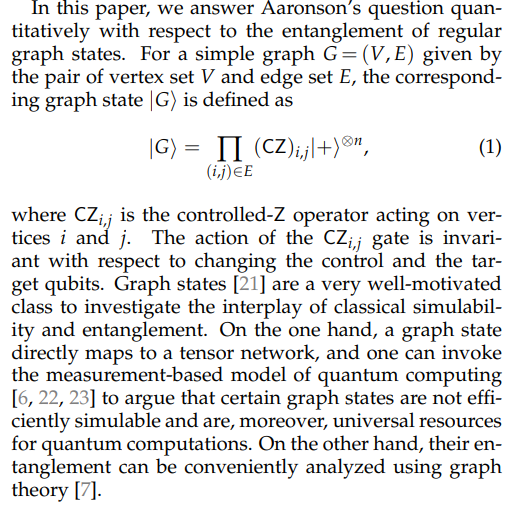



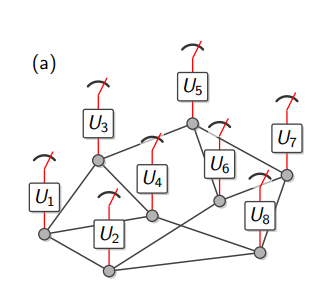


"Our contributions.—In this work, we completely characterize the computational complexity of simulating k–
regular graph states in arbitrary product bases and their
entanglement as a function of the regularity parameter
k; see Fig. 1.", from the paper.

#### the U's:
The arbitrary single qubit rotations, noted by the U's in the diagram, relate to "arbitrary product bases" in the statement above.  

#### the k:
Note: the parameter k would be 3 in the above graph since each vertex is connected to three other vertices.

#### The Results: 
characterize entanglement as a function of k, the regularity parameter<br>

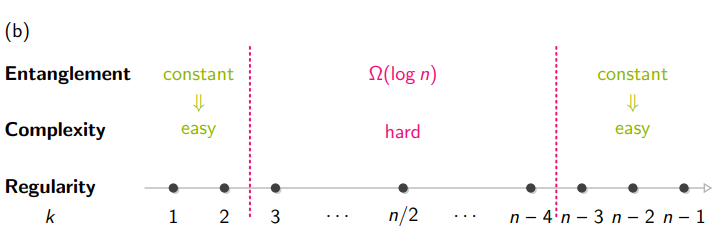

<br>

"Our contributions.—In this work, we completely characterize the computational complexity of simulating k–
regular graph states in arbitrary product bases and their
entanglement as a function of the regularity parameter
k; see Fig. 1.", from the paper.


"Examples of universal resource states are graph states
on hexagonal, square, or triangular lattices [24, 25].
Under closed boundary conditions these resource states
precisely correspond to 3–, 4–, and 6–regular graphs,
respectively. Conversely, graph states on a 2–regular
graph, i.e., a one-dimensional cluster state, and the
graph state on an (n − 1)–regular graph on n qubits,
i.e., the complete graph, are also well studied: both are
efficiently simulable and at the same time have low entanglement [7, 25, 26]. However, for all other values of
the regularity parameter k, it is unknown exactly when,
if at all, classical simulation is intractable, and how the regularity parameter relates to the entanglement of the
corresponding graph state.", from the paper.


#### The Outlook: <br>

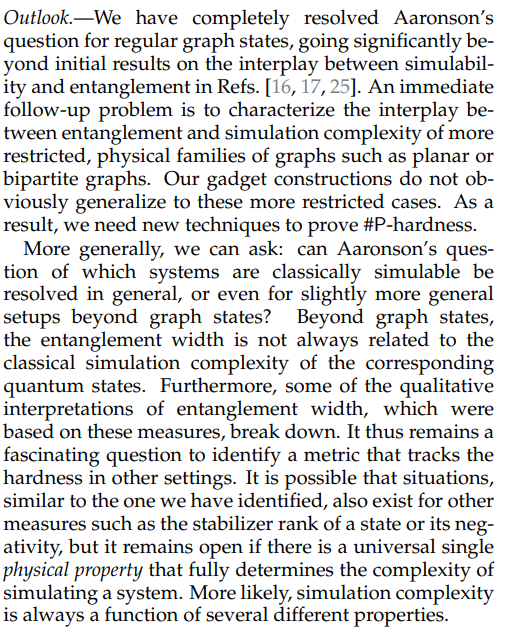

"It remains open if there is a universal single
physical property that fully determines the complexity of
simulating a system. More likely, simulation complexity
is always a function of several different properties," from the paper.